In [10]:
import torch
from torch.optim import Adam
import torch.nn as nn
from src.dataset import MIT
from src.MrCNNs_base import MrCNNs

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [ ]:
model = MrCNNs().to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.7114846..1.9716855].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21685289..1.9706112].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30426806..1.9645393].


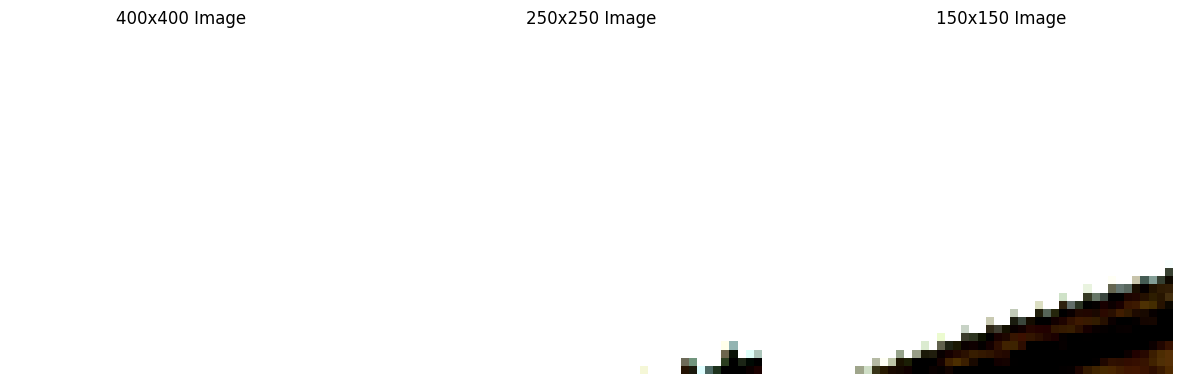

IndexError: index 1 is out of bounds for axis 0 with size 1

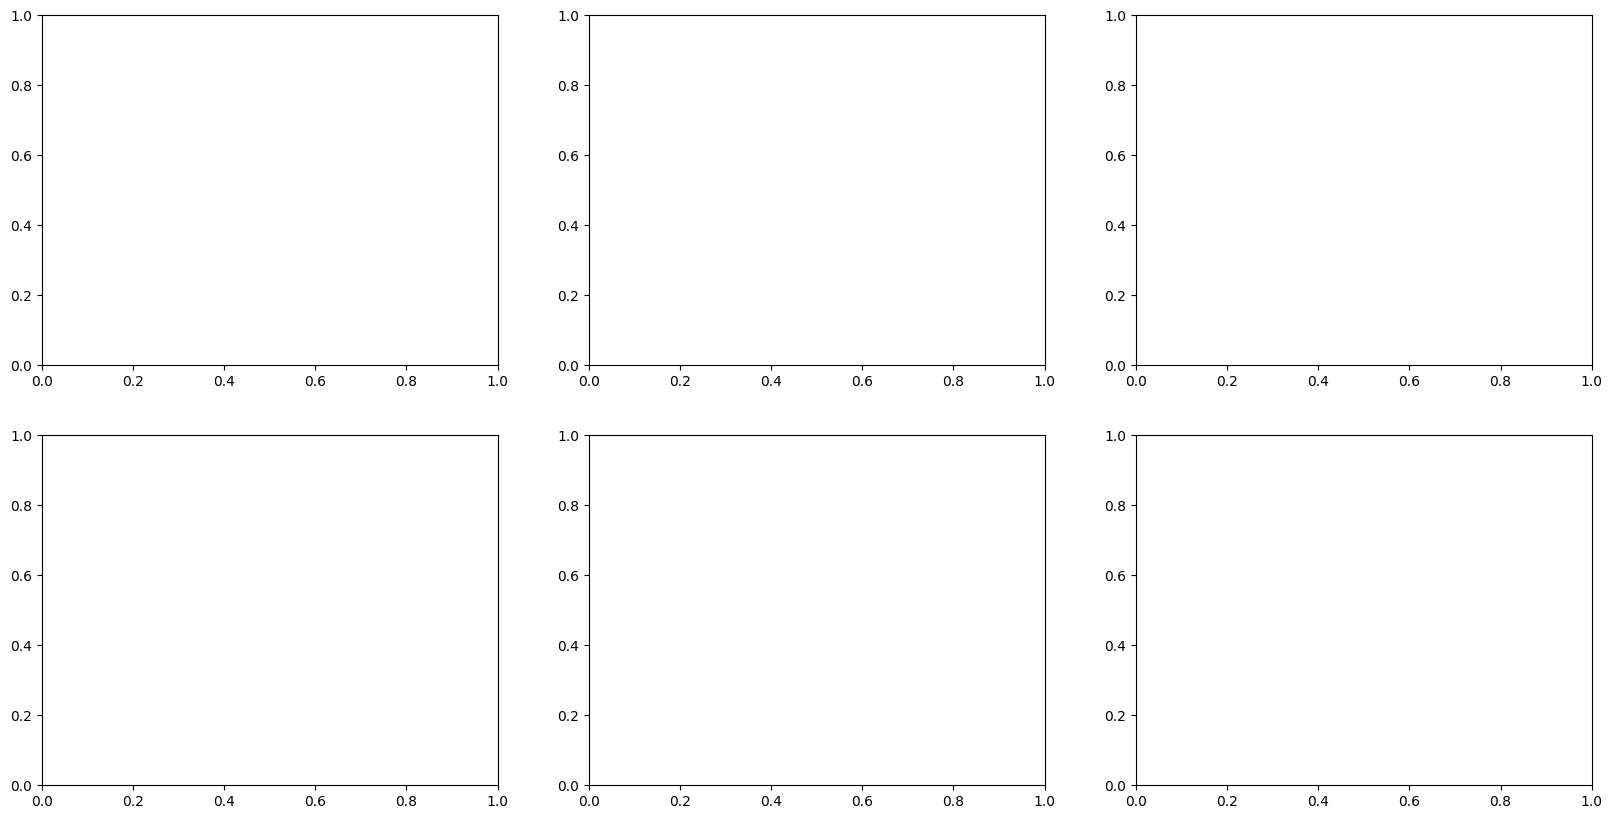

In [15]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

path = '../dataset/train_data.pth.tar'
dataset = MIT(dataset_path=path)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


# visualize the data
for batch in dataloader:
    X, y = batch 
    X_400_crop = X[:, 0, :, :, :]  # dim 0
    X_250_crop = X[:, 1, :, :, :]  # dim 1
    X_150_crop = X[:, 2, :, :, :]  # dim 2

    X_400_resized_np = X_400_crop.squeeze().permute(1, 2, 0).numpy()
    X_250_resized_np = X_250_crop.squeeze().permute(1, 2, 0).numpy()
    X_150_resized_np = X_150_crop.squeeze().permute(1, 2, 0).numpy()

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(X_400_resized_np)
    plt.title("400x400 Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(X_250_resized_np)
    plt.title("250x250 Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(X_150_resized_np)
    plt.title("150x150 Image")
    plt.axis('off')

    plt.show()
    optimizer.zero_grad()
    output = model(X_400_crop, X_250_crop, X_150_crop)
    # print(output.shape)
    # print(output.type())
    y = y.view(-1, 1).float().to(device)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()




In [3]:
# Use Binary Cross Entropy for binary classification

In [12]:
# Training loop
for epoch in range(3):
    for batch in dataloader:
        X, y = batch
        # print(y.shape)
        # print(y.type())
        X_400_crop = X[:, 0, :, :, :].to(device)
        X_250_crop = X[:, 1, :, :, :].to(device)
        X_150_crop = X[:, 2, :, :, :].to(device)
        
        X_400_resized_np = X_400_crop.squeeze().permute(1, 2, 0).numpy()
        X_250_resized_np = X_250_crop.squeeze().permute(1, 2, 0).numpy()
        X_150_resized_np = X_150_crop.squeeze().permute(1, 2, 0).numpy()
        print(X_400_resized_np.shape)
    
        plt.figure(figsize=(15, 5))
    
        plt.subplot(1, 3, 1)
        plt.imshow(X_400_resized_np)
        plt.title("400x400 Image")
        plt.axis('off')
    
        plt.subplot(1, 3, 2)
        plt.imshow(X_250_resized_np)
        plt.title("250x250 Image")
        plt.axis('off')
    
        plt.subplot(1, 3, 3)
        plt.imshow(X_150_resized_np)
        plt.title("150x150 Image")
        plt.axis('off')
    
        plt.show()
        
        optimizer.zero_grad()
        output = model(X_400_crop, X_250_crop, X_150_crop)
        # print(output.shape)
        # print(output.type())
        y = y.view(-1, 1).float().to(device)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 4 is not equal to len(dims) = 3